# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é principal é a aplicação de alguns conceitos estatísticos, mais os conceitos de visualizações de dados através de gráficos.

In [ ]:
pip install -r requirements.txt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"

In [3]:
df = pd.read_csv("SUPERMERCADO_CHILE.csv", delimiter=',')
df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.

**Categoria:** Classificação em espanhol dos produtos de acordo com o seu tipo.




As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.

# 1 - Trazer a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto e identificar as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [4]:
# Calcular a media
media = df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by='Preco_Normal', ascending=False)
media = media.rename(columns={"Preco_Normal": "media"})
print(media)


                    Categoria        media
1          comidas-preparadas  3095.043478
5                     lacteos  2385.219239
2                  congelados  2108.042553
0  belleza-y-cuidado-personal  1783.556485
3                      frutas  1724.473684
6                    verduras  1343.296875
4        instantaneos-y-sopas   765.491228


In [5]:
# Calcular a mediana
mediana = df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Preco_Normal', ascending=False)
mediana = mediana.rename(columns={"Preco_Normal": "mediana"})
print(mediana)


                    Categoria  mediana
1          comidas-preparadas   3290.0
0  belleza-y-cuidado-personal   1569.0
2                  congelados   1519.0
3                      frutas   1195.0
6                    verduras   1180.0
5                     lacteos    989.0
4        instantaneos-y-sopas    439.0


Há a necessidade de calcular a diferença absoluta e a diferença percentual, pois somente a diferença entre valores monetários pode nos enganar se desconsiderarmos a proporcionalidade

In [6]:
# juntar os dois dataframes pela categoria
df_media_mediana = pd.merge(media, mediana, on="Categoria")

# calcular diferenças
df_media_mediana['dif_absoluta'] = (df_media_mediana['media'] - df_media_mediana['mediana'])
df_media_mediana['dif_percentual'] = (df_media_mediana['dif_absoluta'] / df_media_mediana['mediana'] * 100)
print(df_media_mediana.sort_values(by='dif_percentual', ascending=False))


                    Categoria        media  mediana  dif_absoluta  \
1                     lacteos  2385.219239    989.0   1396.219239   
6        instantaneos-y-sopas   765.491228    439.0    326.491228   
4                      frutas  1724.473684   1195.0    529.473684   
2                  congelados  2108.042553   1519.0    589.042553   
5                    verduras  1343.296875   1180.0    163.296875   
3  belleza-y-cuidado-personal  1783.556485   1569.0    214.556485   
0          comidas-preparadas  3095.043478   3290.0   -194.956522   

   dif_percentual  
1      141.174847  
6       74.371578  
4       44.307421  
2       38.778312  
5       13.838718  
3       13.674728  
0       -5.925730  


Acima da Mediana:
1. lacteos (141%)
2. instantaneos-y-sopas (74%)
3. frutas (44%)
4. congelados (39%)
5. verduras (14%)
6. belleza-y-cuidado-personal (14%)

Abaixo da Mediana:
1. comidas-preparadas (-6%)\

# 2 - Calcular o desvio padrão por categoria de produto e e dentificar o comportamento da média e mediana nas categorias com maior desvio.


In [7]:
desvio_padrao_por_categoria = df.groupby('Categoria')['Preco_Normal'].std().reset_index()
desvio_padrao_por_categoria = desvio_padrao_por_categoria.rename(columns={"Preco_Normal": "desvio_padrao"})
print(desvio_padrao_por_categoria.sort_values(by='desvio_padrao', ascending=False))
print('\n_________________________\n')
df_final = pd.merge(df_media_mediana, desvio_padrao_por_categoria, on="Categoria")
print(df_final.sort_values(by='desvio_padrao', ascending=False))

                    Categoria  desvio_padrao
5                     lacteos    3925.816164
0  belleza-y-cuidado-personal    2210.041719
2                  congelados    2111.539896
1          comidas-preparadas    2019.911428
3                      frutas    1639.151114
4        instantaneos-y-sopas    1170.232869
6                    verduras    1012.699625

_________________________

                    Categoria        media  mediana  dif_absoluta  \
1                     lacteos  2385.219239    989.0   1396.219239   
3  belleza-y-cuidado-personal  1783.556485   1569.0    214.556485   
2                  congelados  2108.042553   1519.0    589.042553   
0          comidas-preparadas  3095.043478   3290.0   -194.956522   
4                      frutas  1724.473684   1195.0    529.473684   
6        instantaneos-y-sopas   765.491228    439.0    326.491228   
5                    verduras  1343.296875   1180.0    163.296875   

   dif_percentual  desvio_padrao  
1      141.174847    392

Não há uma correlação direta entre a diferença entre a média e a mediana e o desvio padrão, pois há a possibilidade de termos várias faixas de preços de produtos dentro de uma categoria, mas também existir grande diferença de preço entre essas faixas (sendo notado isso através do desvio padrão).

As categorias que mais apresentam essa característica são as seguintes: `belleza-y-cuidado-personal` e `comidas-preparadas`.

Além disso temos também a categoria `lacteos`, onde os dados mostram a possível presença de ouliers, sendo menos homogênea de que outras categorias. E no lado oposto, temos a categoria `verduras`, onde há uma distribuição equilibrada e menor variação entre os preços.

# 3 - Plotar um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Existem muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

In [8]:
print(df["Categoria"].unique())

['lacteos' 'belleza-y-cuidado-personal' 'congelados' 'frutas'
 'comidas-preparadas' 'verduras' 'instantaneos-y-sopas']


0    19788
1    18228
2    18228
3    18228
4    17988
Name: Preco_Normal, dtype: int64


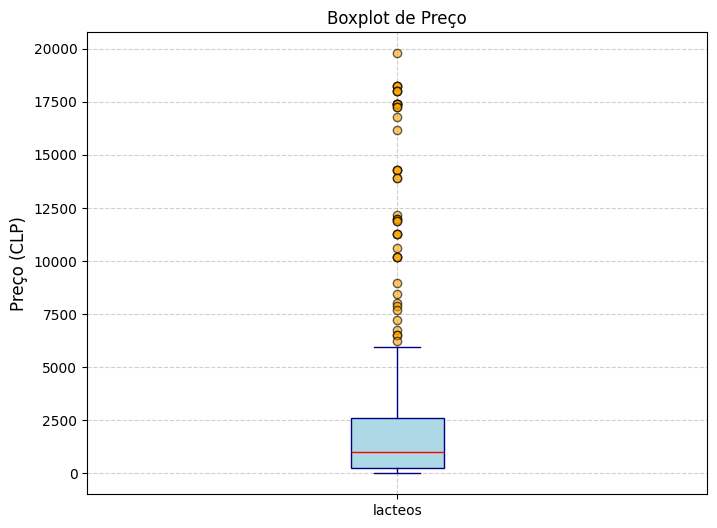

In [9]:
# Criando o boxplot apenas para a coluna de salário
plt.figure(figsize=(8, 6))
precos_lacteos = df.loc[df['Categoria'] == 'lacteos', 'Preco_Normal']
plt.boxplot(precos_lacteos, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="navy"),
            medianprops=dict(color="red", linewidth=1),
            whiskerprops=dict(color="navy"),
            capprops=dict(color="navy"),
            flierprops=dict(markerfacecolor="orange", marker="o", markersize=6, alpha=0.6))

# Legendas e rótulos:
plt.title('Boxplot de Preço', fontsize=12)
plt.ylabel('Preço (CLP)', fontsize=12)
plt.xticks([1], ["lacteos"])
plt.grid(True, linestyle='--', alpha=0.6)
print(precos_lacteos.head())

# 4 - Plotar um gráfico de barras onde temos a média de descontos por categoria.


Este gráfico mostra a comparação da média de descontos
somente em relação aos produtos que tiveram algum desconto.



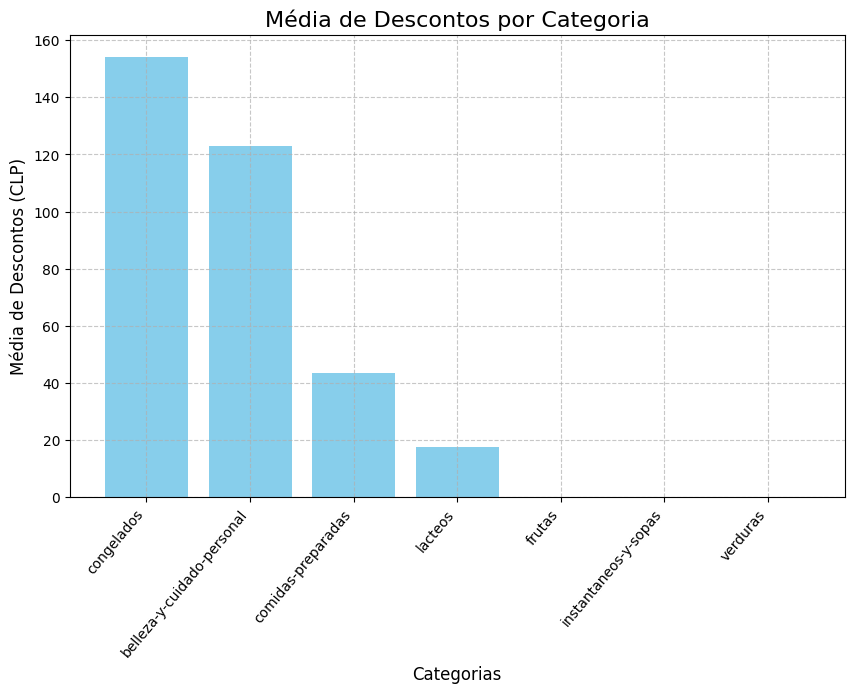

In [10]:
# Calculando a média de descontos por categoria
media_descontos = df.groupby('Categoria')['Desconto'].mean().reset_index().sort_values(by='Desconto', ascending=False)
media_descontos = media_descontos.rename(columns={"Desconto": "media_descontos"})
print('\nEste gráfico mostra a comparação da média de descontos\nsomente em relação aos produtos que tiveram algum desconto.\n')
# Plotando o Gráfico
plt.figure(figsize=(10,6))
plt.bar(media_descontos['Categoria'], media_descontos['media_descontos'], color='skyblue')
plt.title('Média de Descontos por Categoria', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Média de Descontos (CLP)', fontsize=12)
plt.xticks(rotation=50, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# 5 - Plotar um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [11]:
# Agrupar os dados por categoria e marca
media_cat_marca = (
    df.groupby(['Categoria', 'Marca'])['Desconto']
      .mean()
      .reset_index()
      .sort_values(by='Desconto', ascending=False)
)

# Plotar o gráfico
fig = px.bar(media_cat_marca,
             x="Categoria",
             y="Desconto",
             color="Desconto",
             color_continuous_scale=["#ffb347", "#ff7f0e", "#9b59b6", "#6a3d9a"],
             title="Média de Desconto por Categoria e Marca",
             labels={"Desconto":"Média de Desconto (CLP)"},
             barmode="stack",
             height=600,
             width=1000,
             hover_data=["Marca"])

fig.update_layout(
    xaxis_title="Categoria",
    yaxis_title="Média de Desconto (CPL)",
    legend_title="Marca",
    coloraxis_colorbar_title="Desconto (CPL)",
    margin=dict(r=260)
)

# Top 10 marcas
top10 = (
    df.groupby('Marca')['Desconto']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)
legenda = "<b>Top 10 Marcas (Por Média de Descontos)</b><br>" + "<br>".join(
    [f"{m}: {v:.0f} CLP" for m, v in top10.items()]
)

# Adicionar anotação sobre as marcas
fig.add_annotation(
    text=legenda,
    x=0.95, y=0.5,
    xref="paper", yref="paper",
    showarrow=False,
    align="left",
    bgcolor="white",
    bordercolor="black",
    borderwidth=1,
    borderpad=8
)

# Grid pontilhado
fig.update_yaxes(showgrid=True, gridcolor="white", gridwidth=1, griddash="dot")

fig.show()
